In [6]:
!pip install --upgrade pip

     |████████████████████████████████| 1.7 MB 11.5 MB/s eta 0:00:01     |███████▋                        | 409 kB 11.5 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


In [5]:
!git clone https://github.com/entelecheia/eKoNLPy.git
!pip install ./eKoNLPy

Cloning into 'eKoNLPy'...
remote: Enumerating objects: 3590, done.
remote: Total 3590 (delta 0), reused 0 (delta 0), pack-reused 3590
Receiving objects: 100% (3590/3590), 73.30 MiB | 22.05 MiB/s, done.
Resolving deltas: 100% (2618/2618), done.
Processing ./eKoNLPy
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for eKoNLPy: filename=eKoNLPy-0.5.30-py3-none-any.whl size=14437139 sha256=4cc0a0e9af1fcfb2baed3e96a77be66e0db6290f372a95ea1fa3fe43706e7087
  Stored in directory: /private/var/folders/gl/xtlj588j4rdcnbyxmk7bz7jh0000gn/T/pip-ephem-wheel-cache-bydrd52s/wheels/30/5d/21/5e3477821d517803b47b1d16bad9d8fd9730b02eab5d3fee81
Succe

In [65]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

CPU times: user 21 µs, sys: 0 ns, total: 21 µs
Wall time: 24.8 µs


In [66]:
pd.options.display.float_format = '{:.5f}'.format

In [98]:
article_comp = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/test_.csv')
article_comp.columns = ['created_date','article','price','label','token']
article_comp = article_comp[['created_date', 'article', 'token']]
article_comp

,created_date,article,token
0,2018-04-19,도자료는 도자료는 으로 도자료는,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '으로/MA..."
1,2018-04-20,도자료는 으로,"[['도/NNG', '자료/NNG', '으로/NNG']]"
2,2018-04-24,도자료는 도자료는 도자료는 으로,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '도/NNG..."
3,2018-04-25,도자료는,"[['도/NNG', '자료/NNG']]"
4,2018-04-26,도자료는 으로,"[['도/NNG', '자료/NNG', '으로/NNG']]"
...,...,...,...
452,2021-03-03,지난 일 오름 에도 불구하고 비트코인은 말 동안 손실분을 메우기 위해 고군분투하...,"[['오름/NNG', '불구/NNG', '비트코인/NNG', '손실/NNG', '메..."
453,2021-03-04,블록체인 기반 웹 브라우저 브레이브가 자체 검색엔진을 개발한다 이를 위해 브레이브...,"[['블록체인/NNG', '개발/NNG', '하/VV', '위하/VV', '개방형/..."
454,2021-03-08,게임회사 위메이드의 블록체인 계열회사 위메이드트리가 대체불가능토큰 시장에 진출한다...,"[['블록체인/NNG', '계열회사/NNG', '트리/NNG', '대체/MAG', ..."
455,2021-03-09,미국프로농구 댈러스 매버릭스 구단 이자 억만장자 기업가인 마크 큐반이 지난 일 도...,"[['프로/NNG', '농구/NNG', '구단/NNG', '이자/NNG', '억만장..."


In [99]:
price = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/price.csv')
price

,trade_date,price,before_price,label
0,2018-03-15,9010234.20891,nan,nan
1,2018-03-16,9024833.95469,9010234.20891,1.00000
2,2018-03-17,9056906.80354,9024833.95469,1.00000
3,2018-03-18,8470860.29412,9056906.80354,0.00000
4,2018-03-19,8970286.25831,8470860.29412,1.00000
...,...,...,...,...
1318,2021-10-23,74501866.23316,76632600.67319,0.00000
1319,2021-10-24,74478050.59524,74501866.23316,0.00000
1320,2021-10-25,75178560.00732,74478050.59524,1.00000
1321,2021-10-26,75581706.19076,75178560.00732,1.00000


In [100]:
article = article_comp.set_index('created_date')
price = price.set_index('trade_date')

df_con = pd.concat([article, price], axis=1).dropna()
df_con = df_con[['article', 'price', 'label', 'token']]

df_con

,article,price,label,token
2018-04-19,도자료는 도자료는 으로 도자료는,8754047.24105,1.00000,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '으로/MA..."
2018-04-20,도자료는 으로,9020520.71192,1.00000,"[['도/NNG', '자료/NNG', '으로/NNG']]"
2018-04-24,도자료는 도자료는 도자료는 으로,9980132.11203,1.00000,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '도/NNG..."
2018-04-25,도자료는,10290519.14234,1.00000,"[['도/NNG', '자료/NNG']]"
2018-04-26,도자료는 으로,9799738.52757,0.00000,"[['도/NNG', '자료/NNG', '으로/NNG']]"
...,...,...,...,...
2021-03-03,지난 일 오름 에도 불구하고 비트코인은 말 동안 손실분을 메우기 위해 고군분투하...,56740992.17798,1.00000,"[['오름/NNG', '불구/NNG', '비트코인/NNG', '손실/NNG', '메..."
2021-03-04,블록체인 기반 웹 브라우저 브레이브가 자체 검색엔진을 개발한다 이를 위해 브레이브...,57341344.23252,1.00000,"[['블록체인/NNG', '개발/NNG', '하/VV', '위하/VV', '개방형/..."
2021-03-08,게임회사 위메이드의 블록체인 계열회사 위메이드트리가 대체불가능토큰 시장에 진출한다...,57765992.83854,1.00000,"[['블록체인/NNG', '계열회사/NNG', '트리/NNG', '대체/MAG', ..."
2021-03-09,미국프로농구 댈러스 매버릭스 구단 이자 억만장자 기업가인 마크 큐반이 지난 일 도...,60430299.86229,1.00000,"[['프로/NNG', '농구/NNG', '구단/NNG', '이자/NNG', '억만장..."


In [101]:
df_con['article']

2018-04-19                      도자료는     도자료는 으로           도자료는
2018-04-20                                        도자료는 으로      
2018-04-24                      도자료는     도자료는     도자료는 으로      
2018-04-25                                                 도자료는
2018-04-26                                        도자료는 으로      
                                    ...                        
2021-03-03     지난 일 오름 에도 불구하고 비트코인은  말 동안 손실분을 메우기 위해 고군분투하...
2021-03-04     블록체인 기반 웹 브라우저 브레이브가 자체 검색엔진을 개발한다 이를 위해 브레이브...
2021-03-08     게임회사 위메이드의 블록체인 계열회사 위메이드트리가 대체불가능토큰 시장에 진출한다...
2021-03-09     미국프로농구 댈러스 매버릭스 구단 이자 억만장자 기업가인 마크 큐반이 지난 일 도...
2021-03-10     인스타그램에서 비슷한 수법의 암호화폐 사기로 매달 수만달러의 자금이 도난당하고 있...
Name: article, Length: 457, dtype: object

In [102]:
df_con['article'] = df_con['article'].apply(lambda x: x.split(' '))
df_con

,article,price,label,token
2018-04-19,"[, , , , , 도자료는, , , , , 도자료는, 으로, , , , , , ,...",8754047.24105,1.00000,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '으로/MA..."
2018-04-20,"[, , , , , 도자료는, 으로, , , , , , ]",9020520.71192,1.00000,"[['도/NNG', '자료/NNG', '으로/NNG']]"
2018-04-24,"[, , , , , 도자료는, , , , , 도자료는, , , , , 도자료는, 으...",9980132.11203,1.00000,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '도/NNG..."
2018-04-25,"[, , , , , 도자료는]",10290519.14234,1.00000,"[['도/NNG', '자료/NNG']]"
2018-04-26,"[, , , , , 도자료는, 으로, , , , , , ]",9799738.52757,0.00000,"[['도/NNG', '자료/NNG', '으로/NNG']]"
...,...,...,...,...
2021-03-03,"[, 지난, 일, 오름, 에도, 불구하고, 비트코인은, , 말, 동안, 손실분을, ...",56740992.17798,1.00000,"[['오름/NNG', '불구/NNG', '비트코인/NNG', '손실/NNG', '메..."
2021-03-04,"[, 블록체인, 기반, 웹, 브라우저, 브레이브가, 자체, 검색엔진을, 개발한다, ...",57341344.23252,1.00000,"[['블록체인/NNG', '개발/NNG', '하/VV', '위하/VV', '개방형/..."
2021-03-08,"[, 게임회사, 위메이드의, 블록체인, 계열회사, 위메이드트리가, 대체불가능토큰, ...",57765992.83854,1.00000,"[['블록체인/NNG', '계열회사/NNG', '트리/NNG', '대체/MAG', ..."
2021-03-09,"[, 미국프로농구, 댈러스, 매버릭스, 구단, 이자, 억만장자, 기업가인, 마크, ...",60430299.86229,1.00000,"[['프로/NNG', '농구/NNG', '구단/NNG', '이자/NNG', '억만장..."


In [90]:
# def corpus_maker(raw_data):
#   # total count/ up count/ down count
#   corpus = defaultdict(lambda : [0,0,0])
#   for idx, token_book in tqdm(enumerate(raw_data['article'])):
    
#       for token in token_book:
#           if raw_data.iloc[idx].label==1:
#               corpus[token][0]+=1
#               corpus[token][1]+=1
#           elif raw_data.iloc[idx].label==0:
#               corpus[token][0]+=1
#               corpus[token][2]+=1
#           else:
#               corpus[token][0]+=1
            
#   return corpus

In [91]:
crypto_dict = corpus_maker(df_con)
crypto_dict_df = pd.DataFrame(crypto_dict).T

crypto_dict_df.columns = ['total', 'up', 'down']
crypto_dict_df

457it [02:38,  2.89it/s]


,total,up,down
,224836,140916,83920
도,5840,3670,2170
자,8707,5476,3231
료,1658,971,687
는,15042,9324,5718
...,...,...,...
셤,2,2,0
곁,1,0,1
낚,2,2,0
귬,2,2,0


---
---

### Corp Dic Checkpoint

In [103]:
# crypto_dict_df.to_csv('corp_dic_comp.csv')

In [97]:
corp_dic_comp = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/corp_dic_comp.csv')
corp_dic_comp = corp_dic_comp.dropna()
corp_dic_comp

,Unnamed: 0,total,up,down
0,비용/NNG;부담/NNG,1,0,1
1,유동성/NNG;높/VV,1,0,1
2,가격/NNG;낮/VA,1,0,1
3,법무부/NNG,35,12,23
4,소속/NNG,23,13,10
...,...,...,...,...
11517,몬드/NNG,1,1,0
11518,퍼트/NNG,1,1,0
11519,좋/VA;고평가/NNG,1,0,1
11520,차익실현/NNG,1,0,1


In [98]:
corp_dic_comp.sort_values(by='total',ascending=False)

,Unnamed: 0,total,up,down
18,하/VV,9862,5821,4041
63,되/VV,3316,1953,1363
12,암호화폐/NNG,2726,1693,1033
29,비트코인/NNG,2479,1535,944
157,있/VV,2391,1331,1060
...,...,...,...,...
7074,달궜/VV,1,0,1
7073,원대/NNG,1,0,1
7072,연저점/NNG,1,0,1
7070,사라져서/VV,1,0,1


In [99]:
corp_dic_comp[['total']].describe()

,total
count,11522.000000
mean,15.913557
std,122.048013
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,9862.000000


In [100]:
corp_dic = corp_dic_comp[corp_dic_comp['total'] > 10].sort_values(by='total', ascending=False)
corp_dic = corp_dic.set_index('Unnamed: 0')
corp_dic

,total,up,down
Unnamed: 0,,,
하/VV,9862,5821,4041
되/VV,3316,1953,1363
암호화폐/NNG,2726,1693,1033
비트코인/NNG,2479,1535,944
있/VV,2391,1331,1060
...,...,...,...
파/VV,11,6,5
정전/NNG,11,11,0
로스트/NNG,11,4,7


In [101]:
corp_dic['tone_score']=((corp_dic['up']/corp_dic['total'])/(corp_dic['up'].sum()/corp_dic['total'].sum()))/((corp_dic['down']/corp_dic['total'])/(corp_dic['down'].sum()/corp_dic['total'].sum()))
corp_dic

,total,up,down,tone_score
Unnamed: 0,,,,
하/VV,9862,5821,4041,1.045797
되/VV,3316,1953,1363,1.040267
암호화폐/NNG,2726,1693,1033,1.189858
비트코인/NNG,2479,1535,944,1.180524
있/VV,2391,1331,1060,0.911614
...,...,...,...,...
파/VV,11,6,5,0.871204
정전/NNG,11,11,0,inf
로스트/NNG,11,4,7,0.414859


In [102]:
corp_dic.describe()

,total,up,down,tone_score
count,2106.000000,2106.000000,2106.000000,2106.000000
mean,75.888414,43.967711,31.920703,inf
std,277.670726,163.272920,114.899571,nan
min,11.000000,0.000000,0.000000,0.000000
25%,16.000000,10.000000,7.000000,0.726003
50%,27.000000,16.000000,12.000000,1.016405
75%,61.750000,36.000000,26.000000,1.452007
max,9862.000000,5821.000000,4041.000000,inf


In [103]:
%%time
corp_dic['polarity'] = ''

for idx, value in tqdm(enumerate(corp_dic['tone_score'])):
    
  if corp_dic.iloc[idx].total >15:
    if value >= 1:
      corp_dic['polarity'][idx]='positive'
    elif value < 1:
      corp_dic['polarity'][idx]='negative'
    else:
      corp_dic['polarity'][idx]='nothing'

0it [00:00, ?it/s]<timed exec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
2106it [00:00, 3872.68it/s]

CPU times: user 530 ms, sys: 27.8 ms, total: 558 ms
Wall time: 547 ms


In [104]:
corp_dic

,total,up,down,tone_score,polarity
Unnamed: 0,,,,,
하/VV,9862,5821,4041,1.045797,positive
되/VV,3316,1953,1363,1.040267,positive
암호화폐/NNG,2726,1693,1033,1.189858,positive
비트코인/NNG,2479,1535,944,1.180524,positive
있/VV,2391,1331,1060,0.911614,negative
...,...,...,...,...,...
파/VV,11,6,5,0.871204,
정전/NNG,11,11,0,inf,
로스트/NNG,11,4,7,0.414859,


In [105]:
pos_dic = corp_dic[corp_dic['polarity'] == 'positive'].sort_values(by='tone_score',ascending=False)
neg_dic = corp_dic[corp_dic['polarity'] == 'negative'].sort_values(by='tone_score',ascending=False)

In [106]:
pos_list = pos_dic.reset_index(inplace=False)
pos_list.columns = ['positive', 'total', 'up', 'down', 'tone_score', 'polarity']
pos_list = list(pos_list['positive'])

In [107]:
neg_list = neg_dic.reset_index(inplace=False)
neg_list.columns = ['negative', 'total', 'up', 'down', 'tone_score', 'polarity']
neg_list = list(neg_list['negative'])

In [108]:
crypto_dic = corp_dic[['tone_score','polarity']]
crypto_dic

,tone_score,polarity
Unnamed: 0,,
하/VV,1.045797,positive
되/VV,1.040267,positive
암호화폐/NNG,1.189858,positive
비트코인/NNG,1.180524,positive
있/VV,0.911614,negative
...,...,...
파/VV,0.871204,
정전/NNG,inf,
로스트/NNG,0.414859,


In [109]:
temp = crypto_dic.reset_index()
temp.columns = ['corpus','tone_score','polarity']
temp[['corpus','tone_score']]

,corpus,tone_score
0,하/VV,1.045797
1,되/VV,1.040267
2,암호화폐/NNG,1.189858
3,비트코인/NNG,1.180524
4,있/VV,0.911614
...,...,...
2101,파/VV,0.871204
2102,정전/NNG,inf
2103,로스트/NNG,0.414859
2104,대폭/MAG,0.272251


In [110]:
temp = temp[['corpus', 'tone_score']]
crypto_list = list(temp['corpus'])
crypto_score = list(temp['tone_score'])

---

---
---

In [118]:
test_ = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/test_.csv')
test_.columns = ['created_date', 'article', 'price', 'label', 'token']
test = test_
test

,created_date,article,price,label,token
0,2018-04-19,도자료는 도자료는 으로 도자료는,8754047.24105,1.00000,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '으로/MA..."
1,2018-04-20,도자료는 으로,9020520.71192,1.00000,"[['도/NNG', '자료/NNG', '으로/NNG']]"
2,2018-04-24,도자료는 도자료는 도자료는 으로,9980132.11203,1.00000,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '도/NNG..."
3,2018-04-25,도자료는,10290519.14234,1.00000,"[['도/NNG', '자료/NNG']]"
4,2018-04-26,도자료는 으로,9799738.52757,0.00000,"[['도/NNG', '자료/NNG', '으로/NNG']]"
...,...,...,...,...,...
452,2021-03-03,지난 일 오름 에도 불구하고 비트코인은 말 동안 손실분을 메우기 위해 고군분투하...,56740992.17798,1.00000,"[['오름/NNG', '불구/NNG', '비트코인/NNG', '손실/NNG', '메..."
453,2021-03-04,블록체인 기반 웹 브라우저 브레이브가 자체 검색엔진을 개발한다 이를 위해 브레이브...,57341344.23252,1.00000,"[['블록체인/NNG', '개발/NNG', '하/VV', '위하/VV', '개방형/..."
454,2021-03-08,게임회사 위메이드의 블록체인 계열회사 위메이드트리가 대체불가능토큰 시장에 진출한다...,57765992.83854,1.00000,"[['블록체인/NNG', '계열회사/NNG', '트리/NNG', '대체/MAG', ..."
455,2021-03-09,미국프로농구 댈러스 매버릭스 구단 이자 억만장자 기업가인 마크 큐반이 지난 일 도...,60430299.86229,1.00000,"[['프로/NNG', '농구/NNG', '구단/NNG', '이자/NNG', '억만장..."


In [119]:
%%time
word_score = []

for pair in zip(crypto_list, crypto_score):
    pair = list(pair)
    word_score.append(pair)
    
word_score[:5]

CPU times: user 1.02 ms, sys: 13 µs, total: 1.03 ms
Wall time: 1.05 ms


[['하/VV', 0.9723297058704427],
 ['되/VV', 1.00426441836254],
 ['있/VV', 0.9464726401218899],
 ['암호화폐/NNG', 1.1427824468010246],
 ['다/MAG', 1.0433342655647961]]

In [120]:
article_word = []

for i in test['token']:
    q = i.replace('"','').replace('[[','').replace(']]','').split(', ')
    article_word.append(q)

article_word[0][0]

"'도/NNG'"

In [121]:
# article_word = test['token']
tmp = []

for i in tqdm(article_word):
    ar = [[],[]]
    ar[0].append(i)
    
    for j in i:
        
        if j[1:-1] in list(corp_dic.index):
            ar[1].append(word_score[[_[0] for _ in word_score].index(j[1:-1])][1])
    
    tmp.append(ar)
            
len(tmp)

100%|██████████| 457/457 [00:31<00:00, 14.31it/s] 


457

In [123]:
pd.DataFrame(tmp)

,0,1
0,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '으로/MA...","[0.8184082647397646, 0.7713484752104514, 0.818..."
1,"[['도/NNG', '자료/NNG', '으로/NNG']]","[0.8184082647397646, 0.7713484752104514, 0.719..."
2,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '도/NNG...","[0.8184082647397646, 0.7713484752104514, 0.818..."
3,"[['도/NNG', '자료/NNG']]","[0.8184082647397646, 0.7713484752104514]"
4,"[['도/NNG', '자료/NNG', '으로/NNG']]","[0.8184082647397646, 0.7713484752104514, 0.719..."
...,...,...
452,"[['오름/NNG', '불구/NNG', '비트코인/NNG', '손실/NNG', '메...","[0.799125567115537, 1.2043963904384163, 0.8172..."
453,"[['블록체인/NNG', '개발/NNG', '하/VV', '위하/VV', '개방형/...","[0.8227930490684361, 0.805874938459418, 0.9723..."
454,"[['블록체인/NNG', '계열회사/NNG', '트리/NNG', '대체/MAG', ...","[0.8227930490684361, 0.9829244475521104, 0.542..."
455,"[['프로/NNG', '농구/NNG', '구단/NNG', '이자/NNG', '억만장...","[0.998906958894421, 0.654668253060036, 0.73765..."


---

In [2]:
## It just prod

# test = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/article_token.csv')
# test

,created_date,article,token
0,2018-03-15,김동연 부총리 겸 기획재정부 장관은 가상통화에 금을 매기는 게 바람직한지 논의 ...,"[['가상화폐/NNG', '금/NNG', '매기/VV', '바람직/NNG', '논의..."
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,"[['라인/NNG', '금융/NNG', '자회사/NNG', '라인/NNG', '파이..."
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,"[['생산자/NNG', '추천인/NNG', '상/NNG', '부/NNG', '독점/..."
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,"[['도/NNG', '자료/NNG', '풀/VV', '노드/NNG', '돌리/VV'..."
4,2018-04-03,도자료는 으로,"[['도/NNG', '자료/NNG', '으로/NNG']]"
...,...,...,...
605,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,"[['신고점/NNG', '경신/NNG', '하/VV', '비트코인/NNG', '엔/..."
606,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,"[['가상/NNG', '자산/NNG', '사업자/NNG', '신고/NNG', '마감..."
607,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,"[['조정/NNG', '끝/NNG', '알/VV', '달러/NNG', '지지/NNG..."
608,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,"[['증권금융/NNG', '최고/NNG', '규/NNG', '기구/NNG', '증권..."


In [124]:
%%time
word_score = []

for pair in zip(crypto_list, crypto_score):
    pair = list(pair)
    word_score.append(pair)
    
word_score[:5]

CPU times: user 1.66 ms, sys: 98 µs, total: 1.75 ms
Wall time: 1.86 ms


[['하/VV', 0.9723297058704427],
 ['되/VV', 1.00426441836254],
 ['있/VV', 0.9464726401218899],
 ['암호화폐/NNG', 1.1427824468010246],
 ['다/MAG', 1.0433342655647961]]

In [305]:
# 이런 양식으로 가야함..
temp[0].replace('[[','').replace(']]','').split(',')[0]

"'가상화폐/NNG'"

In [125]:
print(crypto_list[:5])
print(word_score[:5])

['하/VV', '되/VV', '있/VV', '암호화폐/NNG', '다/MAG']
[['하/VV', 0.9723297058704427], ['되/VV', 1.00426441836254], ['있/VV', 0.9464726401218899], ['암호화폐/NNG', 1.1427824468010246], ['다/MAG', 1.0433342655647961]]


In [126]:
%%time

tmp = []

for i in range(len(test['token'])):
    t = test['token'][i].replace('"','').replace('[[','').replace(']]','').split(', ')
    tmp.append(t)

CPU times: user 32.7 ms, sys: 9.41 ms, total: 42.1 ms
Wall time: 42.1 ms


In [431]:
# tmp[][] == '라인/NNG'
# len(tmp[]) = 610
# len(tmp[][]) = 2210, 1850, ...

In [437]:
%%time

tmp_score = []

for t in range(len(tmp)):
    for j in range(len(tmp[t])):
        
        if tmp[i][j] in [_[0] for _ in word_score]:
            tmp_score.append(_[1] for _ in word_score)
            
tmp_score[:5]

TypeError: list indices must be integers or slices, not list

In [522]:
tmp = [[], []]

for i in test['token'][4].replace('[[','').replace(']]','').split(', '):
    tmp.append(i)
    
tmp

[[], [], "'도/NNG'", "'자료/NNG'", "'으로/NNG'"]

---

In [19]:
word_score[:5]

[['하/VV', 1.0296973160782181],
 ['되/VV', 1.0135478070306678],
 ['암호화폐/NNG', 1.1669143125700256],
 ['있/VV', 0.8726733844288121],
 ['비트코인/NNG', 1.1555047783378518]]

In [20]:
%%time
# Calculating tone score

score_list = []

for i in tqdm(range(len(test)), desc='Finding token'):
    for sentence in test['token'][i].replace('[[','').replace(']]','').split(', '):
        score_list.append(sentence)
        
score_list

Finding token: 100%|██████████| 610/610 [00:00<00:00, 6333.85it/s]

CPU times: user 82.5 ms, sys: 16 ms, total: 98.5 ms
Wall time: 99.1 ms


["'가상화폐/NNG'",
 "'금/NNG'",
 "'매기/VV'",
 "'바람직/NNG'",
 "'논의/NNG'",
 "'중/NNG'",
 "'기술/NNG'",
 "'발전/NNG'",
 "'가로막/VV'",
 "'않/VX'",
 "'대책/NNG'",
 "'마련/NNG'",
 "'하/VV'",
 "'밝히/VV'",
 "'실/NNG'",
 "'중심/NNG'",
 "'민관/NNG'",
 "'태스크포스/NNG'",
 "'구성/NNG'",
 "'열/VV'",
 "'각국/NNG'",
 "'사례/NNG'",
 "'살/VV'",
 "'펴/VV'",
 "'종/NNG'",
 "'청사/NNG'",
 "'송년/NNG'",
 "'열/VV'",
 "'가상화폐/NNG'",
 "'다수/NNG'",
 "'국가/NNG'",
 "'양도소득/NNG'",
 "'방향/NNG'",
 "'채택/NNG'",
 "'하/VV'",
 "'안다/VV'",
 "'사업소득/NNG'",
 "'법인/NNG'",
 "'드물/VA'",
 "'부가가치/NNG'",
 "'적용/NNG'",
 "'검토/NNG'",
 "'하/XSV'",
 "'고/NNG'",
 "'밝히/VV'",
 "'가상화폐/NNG'",
 "'거래/NNG'",
 "'현황/NNG'",
 "'면밀/NNG'",
 "'시/NNG'",
 "'하/XSV'",
 "'투기/NNG'",
 "'부작용/NNG'",
 "'범죄/NNG'",
 "'악용/NNG'",
 "'대응/NNG'",
 "'하/VV'",
 "'새롭/VA'",
 "'산업혁명/NNG'",
 "'성격/NNG'",
 "'가지/VV'",
 "'하/VV'",
 "'블록체인/NNG'",
 "'기술/NNG'",
 "'발전/NNG'",
 "'저해/NNG'",
 "'하/XSV'",
 "'않/VX'",
 "'하/VV'",
 "'방안/NNG'",
 "'도출/NNG'",
 "'하/VV'",
 "'덧붙이/VV'",
 "'이르/VV'",
 "'중/NNG'",
 "'유럽연합/NNG'",
 "'발표/NNG'",
 "'하/VV'",
 "'조/NN

In [21]:
score_list[:10]

["'가상화폐/NNG'",
 "'금/NNG'",
 "'매기/VV'",
 "'바람직/NNG'",
 "'논의/NNG'",
 "'중/NNG'",
 "'기술/NNG'",
 "'발전/NNG'",
 "'가로막/VV'",
 "'않/VX'"]

In [22]:
test

,created_date,article,token
0,2018-03-15,김동연 부총리 겸 기획재정부 장관은 가상통화에 금을 매기는 게 바람직한지 논의 ...,"[['가상화폐/NNG', '금/NNG', '매기/VV', '바람직/NNG', '논의..."
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,"[['라인/NNG', '금융/NNG', '자회사/NNG', '라인/NNG', '파이..."
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,"[['생산자/NNG', '추천인/NNG', '상/NNG', '부/NNG', '독점/..."
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,"[['도/NNG', '자료/NNG', '풀/VV', '노드/NNG', '돌리/VV'..."
4,2018-04-03,도자료는 으로,"[['도/NNG', '자료/NNG', '으로/NNG']]"
...,...,...,...
605,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,"[['신고점/NNG', '경신/NNG', '하/VV', '비트코인/NNG', '엔/..."
606,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,"[['가상/NNG', '자산/NNG', '사업자/NNG', '신고/NNG', '마감..."
607,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,"[['조정/NNG', '끝/NNG', '알/VV', '달러/NNG', '지지/NNG..."
608,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,"[['증권금융/NNG', '최고/NNG', '규/NNG', '기구/NNG', '증권..."


In [25]:
article_word[0][0]

"'가상화폐/NNG'"

In [127]:
article_word = []

for i in test['token']:
    q = i.replace('"','').replace('[[','').replace(']]','').split(', ')
    article_word.append(q)

article_word[0][0]

"'도/NNG'"

In [678]:
list(corp_dic.index)

['하/VV',
 '되/VV',
 '암호화폐/NNG',
 '있/VV',
 '비트코인/NNG',
 '다/MAG',
 '코인/NNG',
 '도/NNG',
 '달러/NNG',
 '블록체인/NNG',
 '자료/NNG',
 '가격/NNG',
 '거래소/NNG',
 '거래/NNG',
 '않/VX',
 '자산/NNG',
 '가/VV',
 '시장/NNG',
 '위하/VV',
 '없/VA',
 '서비스/NNG',
 '더/MAG',
 '받/VV',
 '밝히/VV',
 '토큰/NNG',
 '통하/VV',
 '중/NNG',
 '투자/NNG',
 '크/VA',
 '규/NNG',
 '기업/NNG',
 '가상/NNG',
 '국/NNG',
 '아니/VCN',
 '있/VA',
 '기술/NNG',
 '많/VA',
 '비트/NNG',
 '이더리움/NNG',
 '같/VA',
 '금융/NNG',
 '따르/VV',
 '정/NNG',
 '오/VV',
 '자금/NNG',
 '은행/NNG',
 '사람/NNG',
 '상승/NNG',
 '채굴/NNG',
 '사용/NNG',
 '문/NNG',
 '때/NNG',
 '데스크/NNG',
 '프로젝트/NNG',
 '공/NNG',
 '시스템/NNG',
 '결/NNG',
 '법/NNG',
 '업체/NNG',
 '오르/VV',
 '시작/NNG',
 '데이터/NNG',
 '개발/NNG',
 '기관/NNG',
 '높/VA',
 '사업/NNG',
 '화폐/NNG',
 '이용/NNG',
 '규모/NNG',
 '안/MAG',
 '운영/NNG',
 '으로/MAG',
 '가장/MAG',
 '발행/NNG',
 '개인/NNG',
 '과/NNG',
 '지갑/NNG',
 '전/NNG',
 '확인/NNG',
 '시/NNG',
 '중앙/NNG',
 '설명/NNG',
 '블/NNG',
 '출시/NNG',
 '발표/NNG',
 '기준/NNG',
 '고객/NNG',
 '지원/NNG',
 '생각/NNG',
 '업/NNG',
 '활용/NNG',
 '가능/NNG',
 '새롭/VA',
 '하락/NNG',
 

In [128]:
# article_word = test['token']
tmp = []

for i in tqdm(article_word):
    ar = [[],[]]
    ar[0].append(i)
    
    for j in i:
        
        if j[1:-1] in list(corp_dic.index):
            ar[1].append(word_score[[_[0] for _ in word_score].index(j[1:-1])][1])
    
    tmp.append(ar)
            
len(tmp)

100%|██████████| 457/457 [00:34<00:00, 13.34it/s] 


457

In [129]:
word_score[407]

['실/VV', 1.1737156767009447]

In [130]:
word_score[[_[0] for _ in word_score].index('가상화폐/NNG')][1]

0.5993441753366526

In [131]:
len(list(corp_dic.index))

1358

In [138]:
tmp_df = pd.DataFrame(tmp)
tmp_df

,0,1
0,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '으로/MA...","[0.8184082647397646, 0.7713484752104514, 0.818..."
1,"[['도/NNG', '자료/NNG', '으로/NNG']]","[0.8184082647397646, 0.7713484752104514, 0.719..."
2,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '도/NNG...","[0.8184082647397646, 0.7713484752104514, 0.818..."
3,"[['도/NNG', '자료/NNG']]","[0.8184082647397646, 0.7713484752104514]"
4,"[['도/NNG', '자료/NNG', '으로/NNG']]","[0.8184082647397646, 0.7713484752104514, 0.719..."
...,...,...
452,"[['오름/NNG', '불구/NNG', '비트코인/NNG', '손실/NNG', '메...","[0.799125567115537, 1.2043963904384163, 0.8172..."
453,"[['블록체인/NNG', '개발/NNG', '하/VV', '위하/VV', '개방형/...","[0.8227930490684361, 0.805874938459418, 0.9723..."
454,"[['블록체인/NNG', '계열회사/NNG', '트리/NNG', '대체/MAG', ...","[0.8227930490684361, 0.9829244475521104, 0.542..."
455,"[['프로/NNG', '농구/NNG', '구단/NNG', '이자/NNG', '억만장...","[0.998906958894421, 0.654668253060036, 0.73765..."


---

In [139]:
test

,created_date,article,price,label,token
0,2018-04-19,도자료는 도자료는 으로 도자료는,8754047.24105,1.00000,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '으로/MA..."
1,2018-04-20,도자료는 으로,9020520.71192,1.00000,"[['도/NNG', '자료/NNG', '으로/NNG']]"
2,2018-04-24,도자료는 도자료는 도자료는 으로,9980132.11203,1.00000,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '도/NNG..."
3,2018-04-25,도자료는,10290519.14234,1.00000,"[['도/NNG', '자료/NNG']]"
4,2018-04-26,도자료는 으로,9799738.52757,0.00000,"[['도/NNG', '자료/NNG', '으로/NNG']]"
...,...,...,...,...,...
452,2021-03-03,지난 일 오름 에도 불구하고 비트코인은 말 동안 손실분을 메우기 위해 고군분투하...,56740992.17798,1.00000,"[['오름/NNG', '불구/NNG', '비트코인/NNG', '손실/NNG', '메..."
453,2021-03-04,블록체인 기반 웹 브라우저 브레이브가 자체 검색엔진을 개발한다 이를 위해 브레이브...,57341344.23252,1.00000,"[['블록체인/NNG', '개발/NNG', '하/VV', '위하/VV', '개방형/..."
454,2021-03-08,게임회사 위메이드의 블록체인 계열회사 위메이드트리가 대체불가능토큰 시장에 진출한다...,57765992.83854,1.00000,"[['블록체인/NNG', '계열회사/NNG', '트리/NNG', '대체/MAG', ..."
455,2021-03-09,미국프로농구 댈러스 매버릭스 구단 이자 억만장자 기업가인 마크 큐반이 지난 일 도...,60430299.86229,1.00000,"[['프로/NNG', '농구/NNG', '구단/NNG', '이자/NNG', '억만장..."


In [140]:
tmp_df = pd.DataFrame(tmp)
# tmp_df

f_df = pd.concat([test,tmp_df],axis=1)
f_df.pop(0)
f_df.columns = ['created_date','article','price','label','token','score']
f_df

,created_date,article,price,label,token,score
0,2018-04-19,도자료는 도자료는 으로 도자료는,8754047.24105,1.00000,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '으로/MA...","[0.8184082647397646, 0.7713484752104514, 0.818..."
1,2018-04-20,도자료는 으로,9020520.71192,1.00000,"[['도/NNG', '자료/NNG', '으로/NNG']]","[0.8184082647397646, 0.7713484752104514, 0.719..."
2,2018-04-24,도자료는 도자료는 도자료는 으로,9980132.11203,1.00000,"[['도/NNG', '자료/NNG', '도/NNG', '자료/NNG', '도/NNG...","[0.8184082647397646, 0.7713484752104514, 0.818..."
3,2018-04-25,도자료는,10290519.14234,1.00000,"[['도/NNG', '자료/NNG']]","[0.8184082647397646, 0.7713484752104514]"
4,2018-04-26,도자료는 으로,9799738.52757,0.00000,"[['도/NNG', '자료/NNG', '으로/NNG']]","[0.8184082647397646, 0.7713484752104514, 0.719..."
...,...,...,...,...,...,...
452,2021-03-03,지난 일 오름 에도 불구하고 비트코인은 말 동안 손실분을 메우기 위해 고군분투하...,56740992.17798,1.00000,"[['오름/NNG', '불구/NNG', '비트코인/NNG', '손실/NNG', '메...","[0.799125567115537, 1.2043963904384163, 0.8172..."
453,2021-03-04,블록체인 기반 웹 브라우저 브레이브가 자체 검색엔진을 개발한다 이를 위해 브레이브...,57341344.23252,1.00000,"[['블록체인/NNG', '개발/NNG', '하/VV', '위하/VV', '개방형/...","[0.8227930490684361, 0.805874938459418, 0.9723..."
454,2021-03-08,게임회사 위메이드의 블록체인 계열회사 위메이드트리가 대체불가능토큰 시장에 진출한다...,57765992.83854,1.00000,"[['블록체인/NNG', '계열회사/NNG', '트리/NNG', '대체/MAG', ...","[0.8227930490684361, 0.9829244475521104, 0.542..."
455,2021-03-09,미국프로농구 댈러스 매버릭스 구단 이자 억만장자 기업가인 마크 큐반이 지난 일 도...,60430299.86229,1.00000,"[['프로/NNG', '농구/NNG', '구단/NNG', '이자/NNG', '억만장...","[0.998906958894421, 0.654668253060036, 0.73765..."


In [141]:
sum(f_df['score'][4])/len(f_df['score'][4])

0.7696565834513996

In [142]:
tone_score = []

print("기사 갯수",len(f_df['score']))
print("기사에 있는 단어 갯수",len(f_df['score'][0]))

for i in tqdm(range(len(f_df['score']))):
    if len(f_df['score'][i]) != 0:
        tone_avg = sum(f_df['score'][i])/len(f_df['score'][i])
        tone_score.append(tone_avg)
    else:
        tone_avg = None
        tone_score.append(tone_avg)
        
len(tone_score)

100%|██████████| 457/457 [00:00<00:00, 37191.19it/s]

기사 갯수 457
기사에 있는 단어 갯수 7


457

In [144]:
pd.DataFrame(tone_score)

,0
0,0.76923
1,0.76966
2,0.78407
3,0.79488
4,0.76966
...,...
452,1.09189
453,1.31675
454,inf
455,inf


In [146]:
analysis_df = pd.concat([f_df,pd.DataFrame(tone_score)],axis=1).dropna()
analysis_df.columns = ['created_date','article','price','label','token','score','article_score']
analysis_df = analysis_df[['created_date','article','article_score']]
analysis_df

,created_date,article,article_score
0,2018-04-19,도자료는 도자료는 으로 도자료는,0.76923
1,2018-04-20,도자료는 으로,0.76966
2,2018-04-24,도자료는 도자료는 도자료는 으로,0.78407
3,2018-04-25,도자료는,0.79488
4,2018-04-26,도자료는 으로,0.76966
...,...,...,...
452,2021-03-03,지난 일 오름 에도 불구하고 비트코인은 말 동안 손실분을 메우기 위해 고군분투하...,1.09189
453,2021-03-04,블록체인 기반 웹 브라우저 브레이브가 자체 검색엔진을 개발한다 이를 위해 브레이브...,1.31675
454,2021-03-08,게임회사 위메이드의 블록체인 계열회사 위메이드트리가 대체불가능토큰 시장에 진출한다...,inf
455,2021-03-09,미국프로농구 댈러스 매버릭스 구단 이자 억만장자 기업가인 마크 큐반이 지난 일 도...,inf


In [31]:
price = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/price.csv')
price.columns = ['created_date','price','before_price','label']
price = price[['created_date','price','label']]
price = price.dropna()
price

,created_date,price,label
1,2018-03-16,9024833.95469,1.00000
2,2018-03-17,9056906.80354,1.00000
3,2018-03-18,8470860.29412,0.00000
4,2018-03-19,8970286.25831,1.00000
5,2018-03-20,9464396.02542,1.00000
...,...,...,...
1318,2021-10-23,74501866.23316,0.00000
1319,2021-10-24,74478050.59524,0.00000
1320,2021-10-25,75178560.00732,1.00000
1321,2021-10-26,75581706.19076,1.00000


In [148]:
analysis_df = pd.merge(analysis_df, price, how='left', on='created_date')
analysis_df

,created_date,article,article_score,price,label
0,2018-04-19,도자료는 도자료는 으로 도자료는,0.76923,8754047.24105,1.00000
1,2018-04-20,도자료는 으로,0.76966,9020520.71192,1.00000
2,2018-04-24,도자료는 도자료는 도자료는 으로,0.78407,9980132.11203,1.00000
3,2018-04-25,도자료는,0.79488,10290519.14234,1.00000
4,2018-04-26,도자료는 으로,0.76966,9799738.52757,0.00000
...,...,...,...,...,...
451,2021-03-03,지난 일 오름 에도 불구하고 비트코인은 말 동안 손실분을 메우기 위해 고군분투하...,1.09189,56740992.17798,1.00000
452,2021-03-04,블록체인 기반 웹 브라우저 브레이브가 자체 검색엔진을 개발한다 이를 위해 브레이브...,1.31675,57341344.23252,1.00000
453,2021-03-08,게임회사 위메이드의 블록체인 계열회사 위메이드트리가 대체불가능토큰 시장에 진출한다...,inf,57765992.83854,1.00000
454,2021-03-09,미국프로농구 댈러스 매버릭스 구단 이자 억만장자 기업가인 마크 큐반이 지난 일 도...,inf,60430299.86229,1.00000


In [149]:
analysis_df = analysis_df.dropna()
analysis_df['article_score'] = [str(_).replace('inf','0.8309676763645697') for _ in analysis_df['article_score']]
analysis_df['article_score'].astype(float)
analysis_df

,created_date,article,article_score,price,label
0,2018-04-19,도자료는 도자료는 으로 도자료는,0.7692342343595938,8754047.24105,1.00000
1,2018-04-20,도자료는 으로,0.7696565834513996,9020520.71192,1.00000
2,2018-04-24,도자료는 도자료는 도자료는 으로,0.7840690328935187,9980132.11203,1.00000
3,2018-04-25,도자료는,0.794878369975108,10290519.14234,1.00000
4,2018-04-26,도자료는 으로,0.7696565834513996,9799738.52757,0.00000
...,...,...,...,...,...
451,2021-03-03,지난 일 오름 에도 불구하고 비트코인은 말 동안 손실분을 메우기 위해 고군분투하...,1.0918875718800378,56740992.17798,1.00000
452,2021-03-04,블록체인 기반 웹 브라우저 브레이브가 자체 검색엔진을 개발한다 이를 위해 브레이브...,1.316746157226535,57341344.23252,1.00000
453,2021-03-08,게임회사 위메이드의 블록체인 계열회사 위메이드트리가 대체불가능토큰 시장에 진출한다...,0.8309676763645697,57765992.83854,1.00000
454,2021-03-09,미국프로농구 댈러스 매버릭스 구단 이자 억만장자 기업가인 마크 큐반이 지난 일 도...,0.8309676763645697,60430299.86229,1.00000


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### Parameters 변경

In [157]:
article_scaled = pd.DataFrame(scaler.fit_transform(analysis_df[['article_score']].rolling(window=120).mean()))
price_scaled = pd.DataFrame(scaler.fit_transform(analysis_df[['price']].rolling(window=120).mean()))

s = pd.concat([article_scaled, price_scaled],axis=1)
s.columns = ['tone','price']
s

,tone,price
0,nan,nan
1,nan,nan
2,nan,nan
3,nan,nan
4,nan,nan
...,...,...
451,1.53828,3.46054
452,1.53298,3.56276
453,1.52905,3.66601
454,1.52905,3.77528


* corr score:  0.7868459101571907


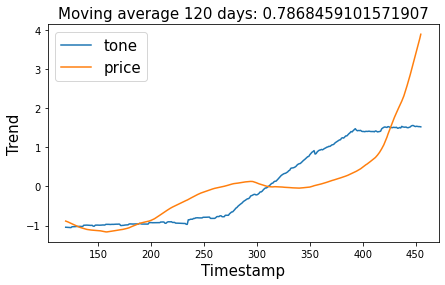

In [158]:
plt.figure(figsize=(7,4))
plt.plot(s)
plt.title("Moving average 120 days: {}".format(article_scaled[0].corr(price_scaled[0])), fontsize=15)
plt.xlabel("Timestamp", fontsize=15)
plt.ylabel("Trend", fontsize=15)
plt.legend(s.columns,fontsize=15)
print("* corr score: ",article_scaled[0].corr(price_scaled[0]))

In [972]:
analysis_df.sort_values(by='article_score',ascending=False)

,created_date,article,article_score,price,label
395,2020-09-30,유럽 암호화폐 거래소 비트판다 가 시리즈 투자로 만달러 약 억원의 투자금을 유치했...,2.3987455963078186,12513400.50469,1.00000
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,2.1405847963411846,8970286.25831,1.00000
307,2020-03-03,블록체인 기반 맛집 플랫폼 소다플레이 개발사 몬스터큐브가 암호화폐 지갑 서비스 비...,1.5411884098327666,10586310.61279,1.00000
464,2021-03-09,페이팔이 암호화폐 수탁업체 커브 인수를 확정했다 페이팔은 일 현지시간 올해 분기 ...,1.4977382807324084,60430299.86229,1.00000
553,2021-08-10,계 최대 규모 스테이블코인 테더 의 발행사 테더 가 예치금 구성에 대한 고서를...,1.4441789567214256,52648607.22477,1.00000
...,...,...,...,...,...
233,2019-09-10,이처럼 페이스북은 리브라를 출시하기에 앞서 규 당국을 설득하기 위해 분 히 움직...,0.9047440752619322,12234394.47368,0.00000
247,2019-10-16,도자료는 으로 도자료는 으로 도자료는 ...,0.897048508018637,9656952.17782,0.00000
347,2020-06-03,암호화폐 정 공시 플랫폼 쟁글 의 예약공시 도에 대한 원성이 들끓고 있다 일부...,0.8963518587556923,11481780.46218,0.00000
419,2020-12-02,오는 일부터 공인인증서가 폐지된다 대신 액티브엑스 등의 프로그램을 설치하지 않아도...,0.8712408418113071,20857794.01408,0.00000


<ipython-input-49-ad2f90731b03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['article_score'] = [str(_).replace('inf','0.9309676763645697') for _ in analysis_df['article_score']]


,created_date,article,article_score,price,label
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,1.2939471518268237,9.024834e+06,1.0
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,2.1405847963411846,8.970286e+06,1.0
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,0.9797488220940854,8.437139e+06,0.0
4,2018-04-03,도자료는 으로,0.9491393674529895,7.904069e+06,1.0
5,2018-04-04,도자료는 으로 도자료는 으로 도자료는,0.918019318949795,7.943745e+06,1.0
...,...,...,...,...,...
602,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,1.0661978781685453,7.887421e+07,1.0
603,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,1.00698531993298,7.663260e+07,0.0
604,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,1.0778009622336067,7.517856e+07,1.0
605,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,1.1314813887929356,7.558171e+07,1.0


---
---

---

### Test data comparison

In [2]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

CPU times: user 1.26 s, sys: 418 ms, total: 1.68 s
Wall time: 1.79 s


In [79]:
pd.options.display.float_format = '{:5f}'.format

In [80]:
price = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/price.csv')
price.columns = ['created_date','price','before_price','label']
price

,created_date,price,before_price,label
0,2018-03-15,9010234.208908,nan,nan
1,2018-03-16,9024833.954689,9010234.208908,1.000000
2,2018-03-17,9056906.803543,9024833.954689,1.000000
3,2018-03-18,8470860.294118,9056906.803543,0.000000
4,2018-03-19,8970286.258314,8470860.294118,1.000000
...,...,...,...,...
1318,2021-10-23,74501866.233163,76632600.673195,0.000000
1319,2021-10-24,74478050.595238,74501866.233163,0.000000
1320,2021-10-25,75178560.007318,74478050.595238,1.000000
1321,2021-10-26,75581706.190764,75178560.007318,1.000000


In [96]:
corp_dic_comp = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/corp_dic_comp.csv')
corp_dic_comp

,Unnamed: 0,total,up,down
0,비용/NNG;부담/NNG,1,0,1
1,유동성/NNG;높/VV,1,0,1
2,가격/NNG;낮/VA,1,0,1
3,법무부/NNG,35,12,23
4,소속/NNG,23,13,10
...,...,...,...,...
11517,몬드/NNG,1,1,0
11518,퍼트/NNG,1,1,0
11519,좋/VA;고평가/NNG,1,0,1
11520,차익실현/NNG,1,0,1


In [82]:
test = pd.read_csv('/Users/yoo/Data-dev/nlp/dev/article_token.csv')
test.columns = ['created_date','article','token']
test = test[['created_date', 'article', 'token']]
test

,created_date,article,token
0,2018-03-15,김동연 부총리 겸 기획재정부 장관은 가상통화에 금을 매기는 게 바람직한지 논의 ...,"[['가상화폐/NNG', '금/NNG', '매기/VV', '바람직/NNG', '논의..."
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,"[['라인/NNG', '금융/NNG', '자회사/NNG', '라인/NNG', '파이..."
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,"[['생산자/NNG', '추천인/NNG', '상/NNG', '부/NNG', '독점/..."
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,"[['도/NNG', '자료/NNG', '풀/VV', '노드/NNG', '돌리/VV'..."
4,2018-04-03,도자료는 으로,"[['도/NNG', '자료/NNG', '으로/NNG']]"
...,...,...,...
605,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,"[['신고점/NNG', '경신/NNG', '하/VV', '비트코인/NNG', '엔/..."
606,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,"[['가상/NNG', '자산/NNG', '사업자/NNG', '신고/NNG', '마감..."
607,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,"[['조정/NNG', '끝/NNG', '알/VV', '달러/NNG', '지지/NNG..."
608,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,"[['증권금융/NNG', '최고/NNG', '규/NNG', '기구/NNG', '증권..."


In [111]:
article_word = []

for i in test['token']:
    q = i.replace('"','').replace('[[','').replace(']]','').split(', ')
    article_word.append(q)

article_word[0][0]

"'가상화폐/NNG'"

In [112]:
%%time
word_score = []

for pair in zip(crypto_list, crypto_score):
    pair = list(pair)
    word_score.append(pair)
    
word_score[:5]

CPU times: user 6.24 ms, sys: 162 µs, total: 6.4 ms
Wall time: 6.37 ms


[['하/VV', 1.0457968598871377],
 ['되/VV', 1.0402673601273984],
 ['암호화폐/NNG', 1.1898582364501997],
 ['비트코인/NNG', 1.1805244062781202],
 ['있/VV', 0.9116135563947094]]

In [113]:
# article_word = test['token']
tmp = []

try:
    for i in tqdm(article_word):
        ar = [[],[]]
        ar[0].append(i)

        for j in i:

            if j[1:-1] in list(corp_dic.index):
                ar[1].append(word_score[[_[0] for _ in word_score].index(j[1:-1])][1])
#             else:
#                 ar[1].append(0)

        tmp.append(ar)
        
except ValueError as e:
    print(e)
            
len(tmp)

100%|██████████| 610/610 [01:19<00:00,  7.70it/s]


610

In [114]:
pd.DataFrame(tmp)

,0,1
0,"[['가상화폐/NNG', '금/NNG', '매기/VV', '바람직/NNG', '논의...","[1.2584056906705834, 2.5478605783533586, 0.518..."
1,"[['라인/NNG', '금융/NNG', '자회사/NNG', '라인/NNG', '파이...","[0.13735197247443998, 1.0125835263999128, 0.53..."
2,"[['생산자/NNG', '추천인/NNG', '상/NNG', '부/NNG', '독점/...","[1.0587547878238082, 1.110357962356397, 1.8668..."
3,"[['도/NNG', '자료/NNG', '풀/VV', '노드/NNG', '돌리/VV'...","[1.0399506487350458, 0.9923616304426492, 1.037..."
4,"[['도/NNG', '자료/NNG', '으로/NNG']]","[1.0399506487350458, 0.9923616304426492, 1.633..."
...,...,...
605,"[['신고점/NNG', '경신/NNG', '하/VV', '비트코인/NNG', '엔/...","[0.2722512311546935, 0.9153954438824478, 1.045..."
606,"[['가상/NNG', '자산/NNG', '사업자/NNG', '신고/NNG', '마감...","[0.8675510929877028, 0.8942393379816671, 0.741..."
607,"[['조정/NNG', '끝/NNG', '알/VV', '달러/NNG', '지지/NNG...","[0.9469608040163253, 1.3612561557734675, 1.113..."
608,"[['증권금융/NNG', '최고/NNG', '규/NNG', '기구/NNG', '증권...","[0.7448605112111094, 1.0727068917333231, 1.122..."


In [115]:
semi_test = pd.merge(test,price, how='left',on='created_date')
semi_test = semi_test[['created_date','article','token','price','label']]
semi_test

,created_date,article,token,price,label
0,2018-03-15,김동연 부총리 겸 기획재정부 장관은 가상통화에 금을 매기는 게 바람직한지 논의 ...,"[['가상화폐/NNG', '금/NNG', '매기/VV', '바람직/NNG', '논의...",9010234.208908,nan
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,"[['라인/NNG', '금융/NNG', '자회사/NNG', '라인/NNG', '파이...",9024833.954689,1.000000
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,"[['생산자/NNG', '추천인/NNG', '상/NNG', '부/NNG', '독점/...",8970286.258314,1.000000
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,"[['도/NNG', '자료/NNG', '풀/VV', '노드/NNG', '돌리/VV'...",8437138.682345,0.000000
4,2018-04-03,도자료는 으로,"[['도/NNG', '자료/NNG', '으로/NNG']]",7904068.976898,1.000000
...,...,...,...,...,...
605,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,"[['신고점/NNG', '경신/NNG', '하/VV', '비트코인/NNG', '엔/...",78874213.677081,1.000000
606,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,"[['가상/NNG', '자산/NNG', '사업자/NNG', '신고/NNG', '마감...",76632600.673195,0.000000
607,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,"[['조정/NNG', '끝/NNG', '알/VV', '달러/NNG', '지지/NNG...",75178560.007318,1.000000
608,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,"[['증권금융/NNG', '최고/NNG', '규/NNG', '기구/NNG', '증권...",75581706.190764,1.000000


In [116]:
tmp_df = pd.DataFrame(tmp)
# tmp_df

f_df = pd.concat([semi_test,tmp_df],axis=1)
f_df.pop(0)
f_df.columns = ['created_date','article','token','price','label','score']
f_df

,created_date,article,token,price,label,score
0,2018-03-15,김동연 부총리 겸 기획재정부 장관은 가상통화에 금을 매기는 게 바람직한지 논의 ...,"[['가상화폐/NNG', '금/NNG', '매기/VV', '바람직/NNG', '논의...",9010234.208908,nan,"[1.2584056906705834, 2.5478605783533586, 0.518..."
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,"[['라인/NNG', '금융/NNG', '자회사/NNG', '라인/NNG', '파이...",9024833.954689,1.000000,"[0.13735197247443998, 1.0125835263999128, 0.53..."
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,"[['생산자/NNG', '추천인/NNG', '상/NNG', '부/NNG', '독점/...",8970286.258314,1.000000,"[1.0587547878238082, 1.110357962356397, 1.8668..."
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,"[['도/NNG', '자료/NNG', '풀/VV', '노드/NNG', '돌리/VV'...",8437138.682345,0.000000,"[1.0399506487350458, 0.9923616304426492, 1.037..."
4,2018-04-03,도자료는 으로,"[['도/NNG', '자료/NNG', '으로/NNG']]",7904068.976898,1.000000,"[1.0399506487350458, 0.9923616304426492, 1.633..."
...,...,...,...,...,...,...
605,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,"[['신고점/NNG', '경신/NNG', '하/VV', '비트코인/NNG', '엔/...",78874213.677081,1.000000,"[0.2722512311546935, 0.9153954438824478, 1.045..."
606,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,"[['가상/NNG', '자산/NNG', '사업자/NNG', '신고/NNG', '마감...",76632600.673195,0.000000,"[0.8675510929877028, 0.8942393379816671, 0.741..."
607,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,"[['조정/NNG', '끝/NNG', '알/VV', '달러/NNG', '지지/NNG...",75178560.007318,1.000000,"[0.9469608040163253, 1.3612561557734675, 1.113..."
608,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,"[['증권금융/NNG', '최고/NNG', '규/NNG', '기구/NNG', '증권...",75581706.190764,1.000000,"[0.7448605112111094, 1.0727068917333231, 1.122..."


In [117]:
%%time
tone_score = []

print("기사 갯수",len(f_df['score']))
print("기사에 있는 단어 갯수",len(f_df['score'][0]))

for i in tqdm(range(len(f_df['score']))):
    if len(f_df['score'][i]) != 0:
        tone_avg = sum(f_df['score'][i])/len(f_df['score'][i])
        tone_score.append(tone_avg)
    else:
        tone_avg = None
        tone_score.append(tone_avg)
        
len(tone_score)

100%|██████████| 610/610 [00:00<00:00, 34762.10it/s]

기사 갯수 610
기사에 있는 단어 갯수 1408


610

In [118]:
analysis_df = pd.concat([f_df,pd.DataFrame(tone_score)],axis=1).dropna()
analysis_df.columns = ['created_date','article','token','price','label','score','article_score']
analysis_df = analysis_df[['created_date','article','article_score']]
analysis_df

,created_date,article,article_score
1,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,0.985727
2,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,1.096174
3,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,1.074087
4,2018-04-03,도자료는 으로,1.221940
5,2018-04-04,도자료는 으로 도자료는 으로 도자료는,0.953171
...,...,...,...
605,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,1.111492
606,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,0.982914
607,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,1.084820
608,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,1.206937


In [119]:
analysis_df = pd.merge(analysis_df, price, how='left', on='created_date')
analysis_df

,created_date,article,article_score,price,before_price,label
0,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,0.985727,9024833.954689,9010234.208908,1.000000
1,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,1.096174,8970286.258314,8470860.294118,1.000000
2,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,1.074087,8437138.682345,8755687.282230,0.000000
3,2018-04-03,도자료는 으로,1.221940,7904068.976898,7562219.606524,1.000000
4,2018-04-04,도자료는 으로 도자료는 으로 도자료는,0.953171,7943745.498499,7904068.976898,1.000000
...,...,...,...,...,...,...
601,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,1.111492,78874213.677081,78423109.619687,1.000000
602,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,0.982914,76632600.673195,78874213.677081,0.000000
603,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,1.084820,75178560.007318,74478050.595238,1.000000
604,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,1.206937,75581706.190764,75178560.007318,1.000000


In [120]:
analysis_df = analysis_df.dropna()
analysis_df['article_score'] = [str(_).replace('inf','-0.1') for _ in analysis_df['article_score']]
analysis_df['article_score'].astype(float)
analysis_df

,created_date,article,article_score,price,before_price,label
0,2018-03-16,라인의 금융 자회사 라인 파이낸셜 통해 일본 금융청에 가상화폐 거래 사업자 신청 ...,0.9857266579564152,9024833.954689,9010234.208908,1.000000
1,2018-03-19,콘텐츠 생산자와 추천인에게 상 는 이용자 정 로 부 독점 페이스북 등에 반기 작...,1.096173842874322,8970286.258314,8470860.294118,1.000000
2,2018-03-29,도자료는 당신이 풀 노드로 돌리고 있는 블록체인에 아동 포르노가 연결되어 ...,1.0740868278365687,8437138.682345,8755687.282230,0.000000
3,2018-04-03,도자료는 으로,1.2219398887019521,7904068.976898,7562219.606524,1.000000
4,2018-04-04,도자료는 으로 도자료는 으로 도자료는,0.9531706002387889,7943745.498499,7904068.976898,1.000000
...,...,...,...,...,...,...
601,2021-10-21,신고점 경신한 비트코인 말엔 리스크 관리 우선해야 비트코인은 지난 일 밤 시경...,1.1114919621256192,78874213.677081,78423109.619687,1.000000
602,2021-10-22,일 금융위원회 위원장 고승범 는 지난 월 일 가상자산 사업자 신고 마감 이후 먹튀...,0.9829141909273531,76632600.673195,78874213.677081,0.000000
603,2021-10-25,조정의 끝을 알고 싶다면 만 달러 지지해야 비트코인은 일 오후 시경 만 달러 선까...,1.0848201521959995,75178560.007318,74478050.595238,1.000000
604,2021-10-26,미국 증권 금융의 최고 규 기구인 증권거래위원회 가 억 달러 규모의 스테이블 코...,1.2069366507603076,75581706.190764,75178560.007318,1.000000


In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

article_scaled = pd.DataFrame(scaler.fit_transform(analysis_df[['article_score']].rolling(window=5).mean()))
price_scaled = pd.DataFrame(scaler.fit_transform(analysis_df[['price']].rolling(window=5).mean()))

s = pd.concat([article_scaled, price_scaled],axis=1)
s.columns = ['tone','price']
s

,tone,price
0,nan,nan
1,nan,nan
2,nan,nan
3,nan,nan
4,0.678774,-0.653090
...,...,...
601,0.807639,2.446978
602,0.760900,2.507616
603,0.784541,2.539926
604,0.850568,2.538290


* corr score:  -0.3547286001227615


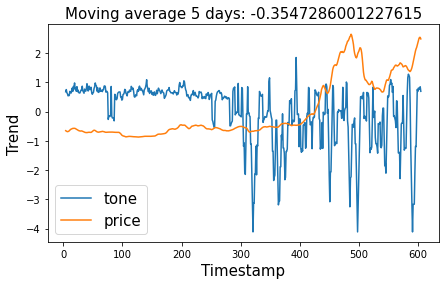

In [135]:
plt.figure(figsize=(7,4))
plt.plot(s)
plt.title("Moving average 5 days: {}".format(article_scaled[0].corr(price_scaled[0])), fontsize=15)
plt.xlabel("Timestamp", fontsize=15)
plt.ylabel("Trend", fontsize=15)
plt.legend(s.columns,fontsize=15)
print("* corr score: ",article_scaled[0].corr(price_scaled[0]))